## Convolutional Neural Networks

Using LeNet Architecture Model for CNN on MNIST Dataset Recognition & using Dropout Layer to reduce Overfitting Problem.

In [ ]:
#pip install tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [5]:
np.random.seed(0)

In [34]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [35]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

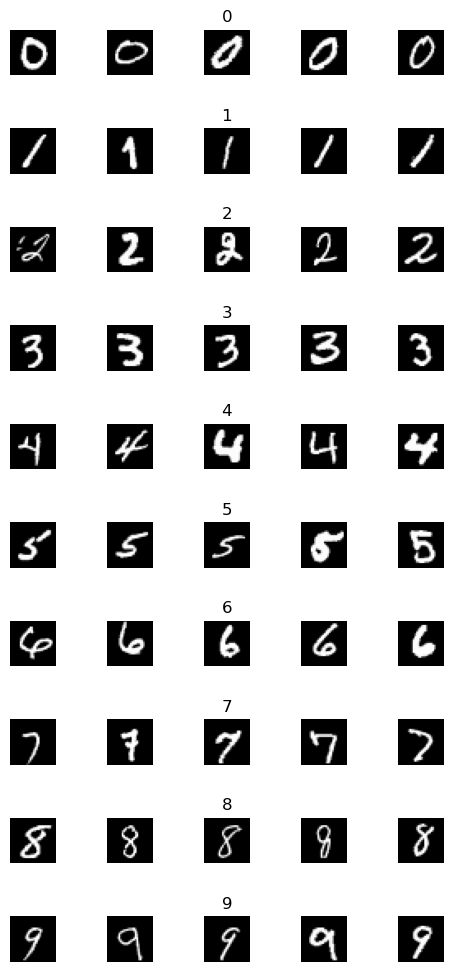

In [36]:
num_of_samples=[]
	 
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
   for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


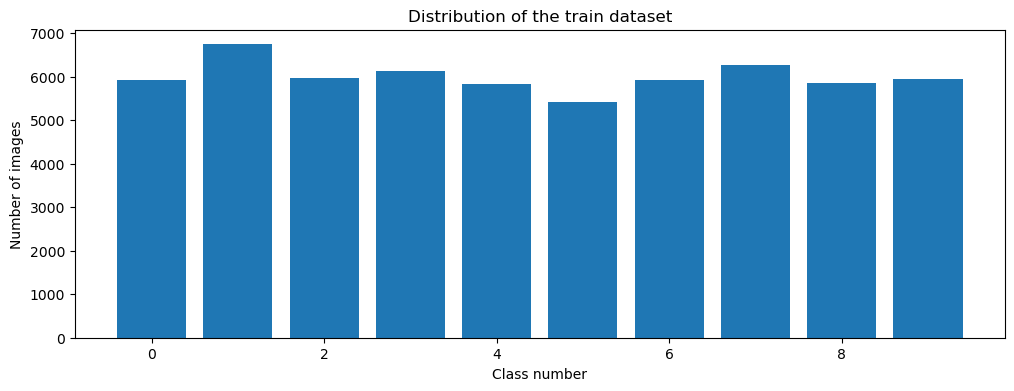

In [37]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [38]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [39]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train/255
X_test = X_test/255

In [40]:
# define the leNet_model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation='relu'))
    # Padding is not used as MNIST dataset consists of centered hand-written digits, 
    # as we aren't interested in outer edges of the images since they do not contain any info
    # Strides are also not used here
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(15, (3, 3), activation= 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
    # Using Dropout layer to fix overfitting problem
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [41]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [42]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 15s 106ms/step - loss: 0.2727 - accuracy: 0.9150 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 2/10
135/135 [==============================] - 14s 105ms/step - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0414 - val_accuracy: 0.9882
Epoch 3/10
135/135 [==============================] - 14s 107ms/step - loss: 0.0559 - accuracy: 0.9822 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 4/10
135/135 [==============================] - 15s 112ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0341 - val_accuracy: 0.9895
Epoch 5/10
135/135 [==============================] - 15s 108ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.0484 - val_accuracy: 0.9882
Epoch 6/10
135/135 [==============================] - 14s 103ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 7/10
135/135 [==============================] - 14s 104ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0431 - val_ac

Text(0.5, 0, 'epoch')

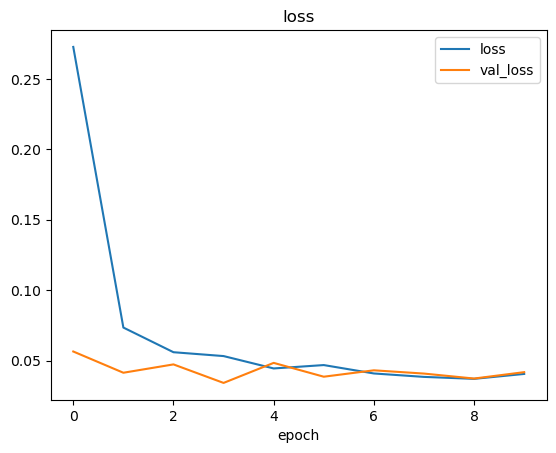

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

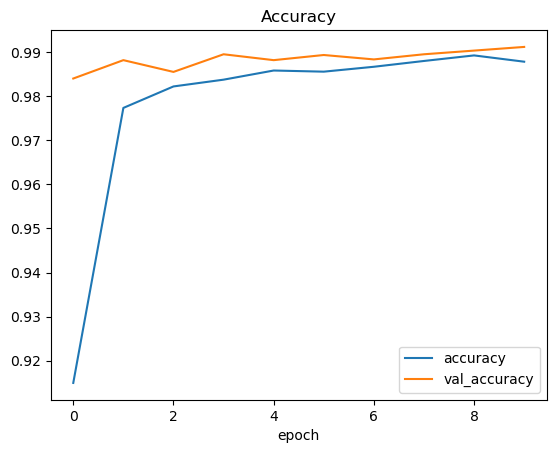

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [83]:
#img=plt.imread('C:/Users/ARVIND/OneDrive/Desktop/AI Class/Convolution-Neural-Network/Handwritten-digit-2.png')
#plt.imshow(img, cmap=plt.get_cmap('gray'))

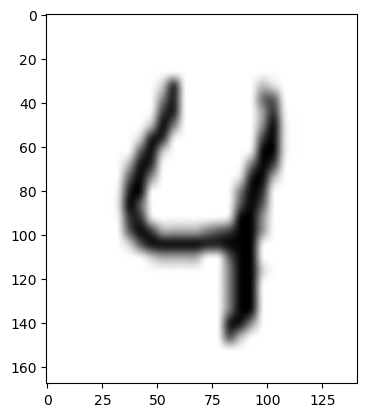

In [57]:
import requests
from PIL import Image
url = 'https://miro.medium.com/max/282/1*xpszL7jJrV5UTV7Xa-fgWQ.png?raw=true'
#url='https://i.stack.imgur.com/qg0H2.png?raw=true'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [104]:

#pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import cv2

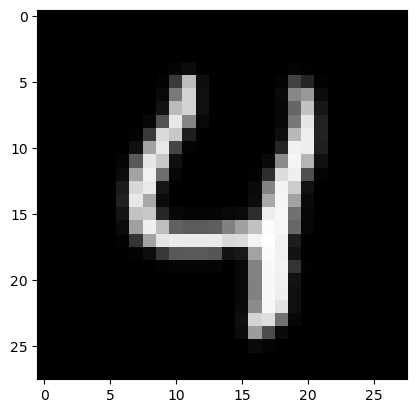

In [58]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap = plt.get_cmap("gray"))

In [59]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [60]:
prediction = model.predict(img)
print("Predicted Digit: ", np.argmax(prediction))

1/1 [==============================] - 0s 13ms/step
Predicted Digit:  4


In [61]:
score  = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score: ', score[0])
print('Test Accuracy', score[1])

<class 'list'>
Test Score:  0.03492617979645729
Test Accuracy 0.9894000291824341


In [62]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
